# 黄金分割法

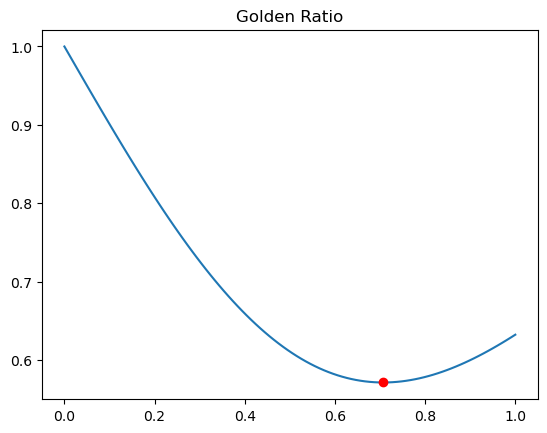

极小值点：0.7072442431366193
极小值：0.5711180737267204
迭代次数：10


In [23]:
import numpy as np
import matplotlib.pyplot as plt
import math

def targetfunction(alpha):
    """目标函数"""
    return 1-alpha*math.e**(-alpha**2) 

def goldenratio():
    """黄金分割法"""
    epsilon = 1e-2 
    a = 0 
    b = 1 # 初始区间
    i = 0 # 迭代次数
    tao=(math.sqrt(5)-1)/2 # 0.618
    alpha = a+(1-tao)*(b-a) # al=a+(1-tao)(b-a)
    beta = a+tao*(b-a) # ar=a+tao(b-a)
    while b-a > epsilon:
        if targetfunction(alpha) < targetfunction(beta):
            b = beta 
            beta = alpha 
            alpha = a+(1-tao)*(b-a) 
            beta = a+tao*(b-a) # 小于则将ar赋值给b
        else:
            a = alpha 
            alpha = beta 
            alpha = a+(1-tao)*(b-a) 
            beta = a+tao*(b-a) # 大于则将al赋值给a
        i = i+1 # 迭代次数加1
    return [(a+b)/2,i] # 返回最优解和迭代次数

alpha = goldenratio() 
x=np.linspace(0,1,100) 
y=[targetfunction(i) for i in x] 
plt.plot(x,y) 
plt.plot(alpha[0],targetfunction(alpha[0]),'ro') 
plt.title("Golden Ratio") 
plt.show() 
print(f"极小值点：{alpha[0]}") 
print(f"极小值：{targetfunction(alpha[0])}")
print(f"迭代次数：{alpha[1]}") 

## Armijo准则搜索

步长：2.9552044145476737e-16


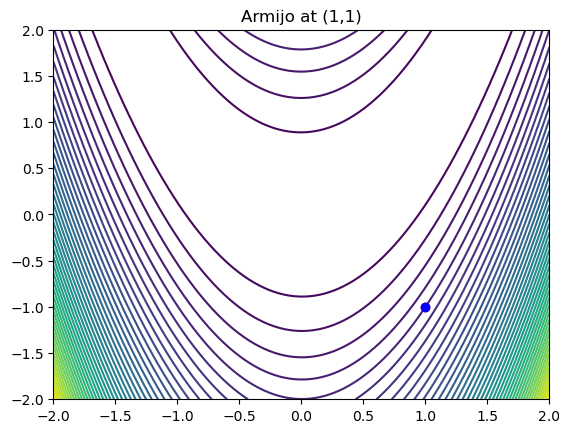

1.0000000000000002 -0.9999999999999997


In [20]:
import numpy as np
import matplotlib.pyplot as plt

def targetfunction(x,y):
    '''目标函数'''
    return 100*(y-x**2)**2+(1-x)**2 

def grad(x,y):
    '''梯度'''
    return np.array([-400*x*(y-x**2)-2*(1-x),200*(y-x**2)]) 

def armijo(x,y,direction):
    '''Armijo准则搜索'''
    alpha = 1 # 设定alpha
    rou = 0.6 # 给定的rou
    while targetfunction(x+alpha*direction[0],y+alpha*direction[1]) > targetfunction(x,y)+rou*alpha*np.dot(grad(x,y),direction):# armijo准则公式
        alpha = alpha*rou 
    return alpha 

def rawarmijo(x,y,direction):
    '''原始Armijo准则搜索'''
    alpha=armijo(x,y,direction) 
    print(f"步长：{alpha}")
    x = x + alpha*direction[0] 
    y = y + alpha*direction[1] 
    return x,y 

x = np.linspace(-2,2,100) 
y = np.linspace(-2,2,100) 
direction=np.array([1,1]) 
X,Y = np.meshgrid(x,y) 
Z = targetfunction(X,Y) 
plt.contour(X,Y,Z,50) 
plt.plot(1,-1,'ro') 

x,y=rawarmijo(1,-1,direction) 
plt.plot(x,y,'bo') 
plt.title("Armijo at (1,1)")
plt.show() 

print(x,y)

可见此方向是上升方向不是良好方向。无法得出有效结果。

取方向的负数作为armijo方法的方向：

步长：0.36


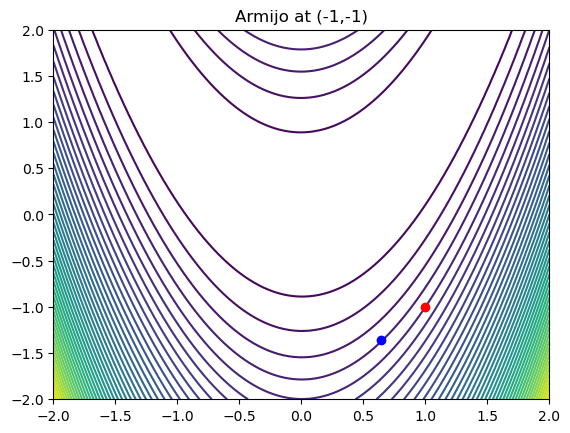

0.64 -1.3599999999999999


In [21]:
x = np.linspace(-2,2,100) 
y = np.linspace(-2,2,100) 
direction=np.array([-1,-1]) 
X,Y = np.meshgrid(x,y) 
Z = targetfunction(X,Y) 
plt.contour(X,Y,Z,50) 
plt.plot(1,-1,'ro') 

x,y=rawarmijo(1,-1,direction) 
plt.plot(x,y,'bo') 
plt.title("Armijo at (-1,-1)")
plt.show() 

print(x,y)

此方向能够得出下降结果，但是由图易得到此方向与极小点差别大。

采用梯度下降法确定方向，即下降方向采用梯度负方向，所得到的方向最好。

C:\Users\Admin\AppData\Local\Temp\ipykernel_19748\3508020330.py:6: RuntimeWarning: overflow encountered in long_scalars
  return 100*(y-x**2)**2+(1-x)**2


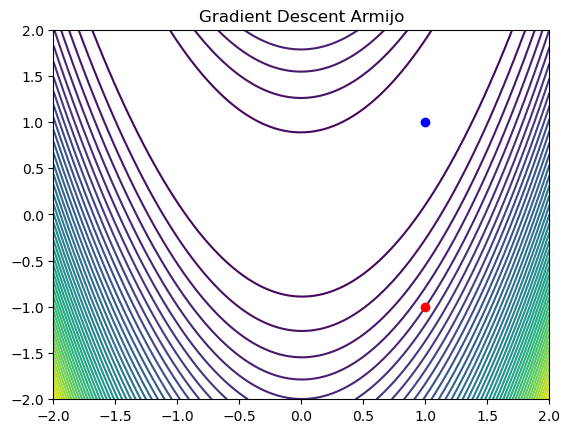

0.9999893915650768 0.9999787475699106
[0.0004701849845759998, 0.0007836416409599997, 0.0021767823359999995, 0.0036279705599999994, 0.0036279705599999994, 0.0036279705599999994, 0.016796159999999997, 0.0036279705599999994, 0.027993599999999997, 0.0036279705599999994, 0.027993599999999997, 0.0036279705599999994, 0.016796159999999997, 0.0036279705599999994, 0.216, 0.0013060694015999995, 0.0013060694015999995, 0.0021767823359999995, 0.016796159999999997, 0.0021767823359999995, 0.016796159999999997, 0.0021767823359999995, 0.046655999999999996, 0.0013060694015999995, 0.0021767823359999995, 0.046655999999999996, 0.0013060694015999995, 0.0021767823359999995, 0.36, 0.0013060694015999995, 0.0036279705599999994, 0.0036279705599999994, 0.0036279705599999994, 0.0021767823359999995, 0.027993599999999997, 0.0013060694015999995, 0.0021767823359999995, 0.016796159999999997, 0.0013060694015999995, 0.006046617599999999, 0.0021767823359999995, 0.010077695999999999, 0.0013060694015999995, 0.006046617599999

In [22]:
def gradientdescent(x,y):
    '''梯度下降法'''
    epsilon = 1e-5 # 精度
    maxiter = 100000 # 最大迭代次数
    iter = 0 # 迭代次数
    ks=[] # 步长
    while iter < maxiter:
        direction = -grad(x,y) 
        alpha = armijo(x,y,direction) 
        ks.append(alpha) 
        x = x + alpha*direction[0] 
        y = y + alpha*direction[1] 
        iter = iter + 1 
        if np.linalg.norm(grad(x,y)) < epsilon:
            break 
    ks.append(iter) # 保存迭代次数
    return x,y,ks

x = np.linspace(-2,2,100) 
y = np.linspace(-2,2,100) 
direction=np.array([1,1]) 
X,Y = np.meshgrid(x,y) 
Z = targetfunction(X,Y) 
plt.contour(X,Y,Z,50) 

x,y,ks = gradientdescent(1,-1) 
plt.plot(1,-1,'ro') 
plt.plot(x,y,'bo')  
plt.title("Gradient Descent Armijo")
plt.show() 
print(x,y) 
print(ks)

由此可见，最小点为(1,1)。迭代次数为6845次。迭代次数较大.